# 0. 시작하기 전에

### 분석목표

전세계에서 가장 인기있는 축구 게임인 FC24의 선수 데이터를 이용하여 가장 사용도가 높고 인기있는 스타선수들인 75이상의 선수들의 공통된 특성과 포지션 별 스탯 상관성 분석, 각 선수들의 장단점을 확인할 수 있는 분석 가이드라인이 되는 것이 목표입니다

### 기본 경로 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/프로젝트/피파')

!pwd

/content/drive/MyDrive/프로젝트/피파


### 패키지 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

### 전체 컬럼, 로우 다 보이게 설정

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 맷플롯립 한글화

In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 1. 탐색적 데이터 분석 (EDA)


### 데이터 불러오기

In [48]:
train = pd.read_csv('male_players.csv')

<ipython-input-6-6fb69bffd713>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('male_players.csv')
<ipython-input-48-6fb69bffd713>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('male_players.csv')


### 각 데이터 확인

In [49]:
train.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

In [50]:
train.shape

(180021, 109)

(180021, 109)

### train 변수 이름 설명

player_id : 선수 고유번호

player_url : 선수 url

fifa_version : 선수 버전 (연도)

fifa_update : 게임 내 업데이트 버전

update_as_of : 마지막 업데이트 날짜

short_name : 숏네임

long_name : 풀네임

player_positions : 포지션

overall : 현재 스탯

potential : 잠재 스탯

value_eur : 가치 (유로)

wage_eur : 급여 (유로)

age : 나이

dob : 생년월일

height_cm : 키(cm)

weight_kg : 몸무게(kg)

club_team_id : 소속 클럽 고유번호

club_name : 클럽 이름

league_id :  소속 리그 고유번호

league_name : 소속 리그 이름

league_level : 리그 등급

club_position : 클럽에서 맡고 있는 주 포지션

club_jersey_number : 클럽에서의 등번호

club_loaned_from : 임대되어 온 팀

club_joined_date : 클럽 입단 날짜

club_contract_valid_until_year : 클럽 계약 종료 기간

nationality_id : 선수 국적 고유번호

nationality_name : 선수 국적

nation_position : 국가대표팀에서 맡고 있는 주 포지션

nation_jersey_number : 국가대표팀에서의 등번호

preferred_foot : 주로 사용하는 발

weak_foot : 약한 발 사용 능력

skill_moves : 개인기 능력

international_reputation : 명성

work_rate : 헌신도(클럽/국가대표)

body_type : 체형

real_face : 게임 상 실제 얼굴 반영 여부

release_clause_eur : 바이아웃 금액 (유로)

player_tags	: 특징

player_traits : 특성

pace : 속도

shooting : 슛

passing : 패스

dribbling : 드리블

defending : 수비

physic : 몸싸움

attacking_crossing : 공격_크로스

attacking_finishing : 공격_골결정력

attacking_heading_accuracy : 공격_헤딩

attacking_short_passing : 공격_짧은패스

attacking_volleys : 공격_발리슛

skill_dribbling	: 기술_드리블

skill_curve : 기술_커브

skill_fk_accuracy : 기술_프리킥

skill_long_passing : 기술_긴패스

skill_ball_control : 기술_볼컨트롤

movement_acceleration : 움직임_가속도

movement_sprint_speed : 움직임_속도

movement_agility : 움직임_민첩성

movement_reactions : 움직임_반응속도

movement_balance : 움직임_밸런스

power_shot_power : 파워_슛파워

power_jumping : 파워_점프

power_stamina : 파워_스태미너

power_strength : 파워_힘

power_long_shots : 파워_중거리슛

mentality_aggression : 멘탈_적극성

mentality_interceptions	: 멘탈_가로채기

mentality_positioning : 멘탈_위치선정

mentality_vision : 멘탈_시야

mentality_penalties : 멘탈_페널티킥

mentality_composure : 멘탈_침착성

defending_marking_awareness : 수비_대인수비

defending_standing_tackle : 수비_스탠딩태클

defending_sliding_tackle : 수비_슬라이딩태클

goalkeeping_diving : 골키핑_다이빙

goalkeeping_handling : 골키핑_핸들링

goalkeeping_kicking : 골키핑_골킥

goalkeeping_positioning : 골키핑_위치선정

goalkeeping_reflexes : 골키핑_반응속도

goalkeeping_speed : 골키핑_스피드

이하 : 각 포지션 배치 별 스탯

### 칼럼명 한글화

In [51]:
train.columns = ['선수ID', '선수URL', '게임버전', '업데이트버전', '업데이트 일자', '이름', '풀네임', '포지션', '오버롤', '잠재오버롤', '가치', '급여', '나이', '생년월일', '키', '몸무게', '클럽ID', '클럽명', '리그ID', '리그명', '리그등급', '클럽포지션', '클럽 등번호', '임대클럽', '클럽입단일자', '계약종료일자', '국가ID', '국적', '국가대표팀ID', '국가대표팀 포지션','국가대표팀 등번호', '주사용발', '약발능력', '개인기', '명성', '헌신도', '체형', '실제 얼굴 반영', '바이아웃 금액', '특징', '특성', '속도', '슛', '패스', '드리블1', '수비', '신체능력', '크로스', '골결정력', '헤딩', '짧은 패스', '발리슛', '드리블', '커브', '프리킥', '긴패스', '볼컨트롤', '가속력', '속력', '민첩성', '반응속도', '밸런스', '슛파워', '점프', '스태미너', '힘', '중거리슛', '적극성', '가로채기', '위치선정', '시야', '페널티킥', '침착성', '대인수비', '스탠딩태클', '슬라이딩태클', '골키퍼 다이빙', '골키퍼 핸들링', '골키퍼 골킥', '골키퍼 위치선정', '골키퍼 반응속도', '골키퍼 스피드', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

### 오버롤 75이상인 골드 등급 선수들만 남기기

In [52]:
train = train[train['오버롤'] >= 75]

### 피처요약표

In [53]:
def resumetable(train):
    print(f'데이터셋 형상: {train.shape}')
    summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처 이름'})
    summary['결측값 개수'] = train.isnull().sum().values
    summary['빈 문자열 존재 여부'] = train.apply(lambda x : x.eq('').any()).values
    summary['고윳값 개수'] = train.nunique().values
    summary['첫 번째 값'] = train.loc[0].values
    summary['두 번째 값'] = train.loc[1].values
    summary['세 번째 값'] = train.loc[2].values
    return summary

resumetable(train)

데이터셋 형상: (18912, 109)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,선수ID,int64,0,False,4911,231747,239085,192985
1,선수URL,object,0,False,18912,/player/231747/kylian-mbappe/240002,/player/239085/erling-haaland/240002,/player/192985/kevin-de-bruyne/240002
2,게임버전,float64,0,False,10,24.0,24.0,24.0
3,업데이트버전,float64,0,False,1,2.0,2.0,2.0
4,업데이트 일자,object,0,False,10,2023-09-22,2023-09-22,2023-09-22
5,이름,object,0,False,4787,K. Mbappé,E. Haaland,K. De Bruyne
6,풀네임,object,0,False,4910,Kylian Mbappé Lottin,Erling Braut Haaland,Kevin De Bruyne
7,포지션,object,0,False,758,"ST, LW",ST,"CM, CAM"
8,오버롤,int64,0,False,20,91,91,91
9,잠재오버롤,int64,0,False,21,94,94,91


데이터셋 형상: (18912, 109)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,선수ID,int64,0,False,4911,231747,239085,192985
1,선수URL,object,0,False,18912,/player/231747/kylian-mbappe/240002,/player/239085/erling-haaland/240002,/player/192985/kevin-de-bruyne/240002
2,게임버전,float64,0,False,10,24.0,24.0,24.0
3,업데이트버전,float64,0,False,1,2.0,2.0,2.0
4,업데이트 일자,object,0,False,10,2023-09-22,2023-09-22,2023-09-22
5,이름,object,0,False,4787,K. Mbappé,E. Haaland,K. De Bruyne
6,풀네임,object,0,False,4910,Kylian Mbappé Lottin,Erling Braut Haaland,Kevin De Bruyne
7,포지션,object,0,False,758,"ST, LW",ST,"CM, CAM"
8,오버롤,int64,0,False,20,91,91,91
9,잠재오버롤,int64,0,False,21,94,94,91


### 칼럼 통계치 확인

In [54]:
round(train.describe(), 2)

,선수ID,게임버전,업데이트버전,오버롤,잠재오버롤,가치,급여,나이,키,몸무게,클럽ID,리그ID,리그등급,클럽 등번호,계약종료일자,국가ID,국가대표팀ID,국가대표팀 등번호,약발능력,개인기,명성,바이아웃 금액,속도,슛,패스,드리블1,수비,신체능력,크로스,골결정력,헤딩,짧은 패스,발리슛,드리블,커브,프리킥,긴패스,볼컨트롤,가속력,속력,민첩성,반응속도,밸런스,슛파워,점프,스태미너,힘,중거리슛,적극성,가로채기,위치선정,시야,페널티킥,침착성,대인수비,스탠딩태클,슬라이딩태클,골키퍼 다이빙,골키퍼 핸들링,골키퍼 골킥,골키퍼 위치선정,골키퍼 반응속도,골키퍼 스피드
count,18912.00,18912.00,18912.0,18912.00,18912.00,1.865700e+04,18688.00,18912.00,18912.00,18912.00,18683.00,18683.00,18611.00,18683.00,18683.00,18912.00,4862.00,4862.00,18912.00,18912.00,18912.00,1.308700e+04,17006.00,17006.00,17006.00,17006.00,17006.00,17006.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,16037.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,1906.00
mean,196798.42,19.66,2.0,78.02,80.08,1.374116e+07,50582.07,27.52,181.90,76.64,16756.67,87.60,1.03,16.50,2021.31,46.14,17787.32,11.71,3.20,2.80,1.76,2.812989e+07,71.89,64.45,69.69,73.40,60.38,71.92,61.01,56.54,60.90,70.70,54.74,66.82,60.21,53.95,65.16,70.49,69.11,69.47,69.19,75.62,66.68,69.21,70.33,70.86,70.85,59.83,66.13,56.63,61.47,66.17,57.63,72.34,54.41,56.24,53.14,17.38,17.10,16.81,17.23,17.50,46.40
std,37724.93,2.71,0.0,3.14,3.95,1.444059e+07,46322.17,3.96,6.89,7.28,38533.50,214.33,0.18,15.33,2.94,33.19,38797.75,6.79,0.73,0.96,0.81,2.888964e+07,11.71,13.55,8.48,8.83,18.84,8.27,19.88,21.41,19.44,14.45,20.42,19.92,20.45,20.01,14.77,17.31,14.34,13.87,14.12,5.01,14.79,14.71,11.60,15.10,11.46,20.67,17.29,22.96,21.62,13.94,17.43,9.26,23.56,24.46,24.71,20.89,20.03,19.08,20.50,21.38,8.35
min,28.00,15.00,2.0,75.00,75.00,1.100000e+05,500.00,17.00,158.00,54.00,1.00,1.00,1.00,1.00,2015.00,1.00,974.00,1.00,1.00,1.00,1.00,6.750000e+05,23.00,18.00,34.00,35.00,16.00,35.00,7.00,4.00,6.00,11.00,4.00,7.00,7.00,7.00,11.00,9.00,19.00,16.00,19.00,39.00,17.00,10.00,27.00,16.00,21.00,4.00,11.00,6.00,3.00,10.00,9.00,11.00,4.00,7.00,8.00,1.00,1.00,1.00,1.00,1.00,19.00
25%,183512.00,17.00,2.0,76.00,77.00,6.000000e+06,20000.00,25.00,177.00,72.00,48.00,14.00,1.00,7.00,2019.00,21.00,1337.00,6.00,3.00,2.00,1.00,1.240000e+07,66.00,56.00,65.00,70.00,41.00,67.00,52.75,42.00,53.00,69.00,41.00,63.00,49.00,40.00,60.00,70.00,61.00,62.00,61.00,72.00,57.00,64.00,64.00,67.00,64.00,51.00,57.00,34.00,52.00,59.00,47.00,69.00,32.00,33.00,28.00,8.00,8.00,8.00,8.00,8.00,41.00
50%,201399.00,20.00,2.0,77.00,79.00,9.000000e+06,40000.00,27.00,182.00,76.00,247.00,31.00,1.00,13.00,2021.00,45.00,1361.00,11.00,3.00,3.00,2.00,1.890000e+07,73.00,69.00,71.00,75.00,70.00,73.00,68.00,63.00,66.00,75.00,60.00,74.00,67.00,58.00,69.00,76.00,72.00,72.00,72.00,75.00,69.00,74.00,72.00,74.00,72.00,68.00,71.00,68.00,70.00,70.00,61.00,74.00,63.00,68.00,63.00,11.00,11.00,11.00,11.00,11.00,46.00
75%,220710.00,22.00,2.0,80.00,83.00,1.600000e+07,62000.00,30.00,187.00,82.00,1808.00,53.00,1.00,22.00,2023.00,54.00,1377.00,17.00,4.00,3.00,2.00,3.260000e+07,80.00,75.00,75.00,79.00,76.00,78.00,75.00,74.00,75.00,79.00,71.00,79.00,76.00,70.00,75.00,80.00,79.00,79.00,79.00,79.00,77.00,79.00,78.00,80.00,79.00,74.00,79.00,76.00,77.00,76.00,71.00,78.00,75.00,77.00,75.00,14.00,14.00,14.00,14.00,14.00,52.00
max,278013.00,24.00,2.0,94.00,95.00,1.940000e+08,575000.00,44.00,203.00,110.00,131389.00,2025.00,2.00,99.00,2032.00,219.00,111527.00,95.00,5.00,5.00,5.00,3.735000e+08,97.00,94.00,94.00,96.00,91.00,92.00,95.00,96.00,95.00,95.00,93.00,97.00,94.00,95.00,95.00,96.00,97.00,97.00,96.00,96.00,97.00,95.00,96.00,97.00,96.00,94.00,96.00,93.00,96.00,96.00,96.00,96.00,94.00,94.00,95.00,91.00,92.00,95.00,92.00,94.00,67.00


,선수ID,게임버전,업데이트버전,오버롤,잠재오버롤,가치,급여,나이,키,몸무게,클럽ID,리그ID,리그등급,클럽 등번호,계약종료일자,국가ID,국가대표팀ID,국가대표팀 등번호,약발능력,개인기,명성,바이아웃 금액,속도,슛,패스,드리블1,수비,신체능력,크로스,골결정력,헤딩,짧은 패스,발리슛,드리블,커브,프리킥,긴패스,볼컨트롤,가속력,속력,민첩성,반응속도,밸런스,슛파워,점프,스태미너,힘,중거리슛,적극성,가로채기,위치선정,시야,페널티킥,침착성,대인수비,스탠딩태클,슬라이딩태클,골키퍼 다이빙,골키퍼 핸들링,골키퍼 골킥,골키퍼 위치선정,골키퍼 반응속도,골키퍼 스피드
count,18912.00,18912.00,18912.0,18912.00,18912.00,1.865700e+04,18688.00,18912.00,18912.00,18912.00,18683.00,18683.00,18611.00,18683.00,18683.00,18912.00,4862.00,4862.00,18912.00,18912.00,18912.00,1.308700e+04,17006.00,17006.00,17006.00,17006.00,17006.00,17006.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,16037.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,18912.00,1906.00
mean,196798.42,19.66,2.0,78.02,80.08,1.374116e+07,50582.07,27.52,181.90,76.64,16756.67,87.60,1.03,16.50,2021.31,46.14,17787.32,11.71,3.20,2.80,1.76,2.812989e+07,71.89,64.45,69.69,73.40,60.38,71.92,61.01,56.54,60.90,70.70,54.74,66.82,60.21,53.95,65.16,70.49,69.11,69.47,69.19,75.62,66.68,69.21,70.33,70.86,70.85,59.83,66.13,56.63,61.47,66.17,57.63,72.34,54.41,56.24,53.14,17.38,17.10,16.81,17.23,17.50,46.40
std,37724.93,2.71,0.0,3.14,3.95,1.444059e+07,46322.17,3.96,6.89,7.28,38533.50,214.33,0.18,15.33,2.94,33.19,38797.75,6.79,0.73,0.96,0.81,2.888964e+07,11.71,13.55,8.48,8.83,18.84,8.27,19.88,21.41,19.44,14.45,20.42,19.92,20.45,20.01,14.77,17.31,14.34,13.87,14.12,5.01,14.79,14.71,11.60,15.10,11.46,20.67,17.29,22.96,21.62,13.94,17.43,9.26,23.56,24.46,24.71,20.89,20.03,19.08,20.50,21.38,8.35
min,28.00,15.00,2.0,75.00,75.00,1.100000e+05,500.00,17.00,158.00,54.00,1.00,1.00,1.00,1.00,2015.00,1.00,974.00,1.00,1.00,1.00,1.00,6.750000e+05,23.00,18.00,34.00,35.00,16.00,35.00,7.00,4.00,6.00,11.00,4.00,7.00,7.00,7.00,11.00,9.00,19.00,16.00,19.00,39.00,17.00,10.00,27.00,16.00,21.00,4.00,11.00,6.00,3.00,10.00,9.00,11.00,4.00,7.00,8.00,1.00,1.00,1.00,1.00,1.00,19.00
25%,183512.00,17.00,2.0,76.00,77.00,6.000000e+06,20000.00,25.00,177.00,72.00,48.00,14.00,1.00,7.00,2019.00,21.00,1337.00,6.00,3.00,2.00,1.00,1.240000e+07,66.00,56.00,65.00,70.00,41.00,67.00,52.75,42.00,53.00,69.00,41.00,63.00,49.00,40.00,60.00,70.00,61.00,62.00,61.00,72.00,57.00,64.00,64.00,67.00,64.00,51.00,57.00,34.00,52.00,59.00,47.00,69.00,32.00,33.00,28.00,8.00,8.00,8.00,8.00,8.00,41.00
50%,201399.00,20.00,2.0,77.00,79.00,9.000000e+06,40000.00,27.00,182.00,76.00,247.00,31.00,1.00,13.00,2021.00,45.00,1361.00,11.00,3.00,3.00,2.00,1.890000e+07,73.00,69.00,71.00,75.00,70.00,73.00,68.00,63.00,66.00,75.00,60.00,74.00,67.00,58.00,69.00,76.00,72.00,72.00,72.00,75.00,69.00,74.00,72.00,74.00,72.00,68.00,71.00,68.00,70.00,70.00,61.00,74.00,63.00,68.00,63.00,11.00,11.00,11.00,11.00,11.00,46.00
75%,220710.00,22.00,2.0,80.00,83.00,1.600000e+07,62000.00,30.00,187.00,82.00,1808.00,53.00,1.00,22.00,2023.00,54.00,1377.00,17.00,4.00,3.00,2.00,3.260000e+07,80.00,75.00,75.00,79.00,76.00,78.00,75.00,74.00,75.00,79.00,71.00,79.00,76.00,70.00,75.00,80.00,79.00,79.00,79.00,79.00,77.00,79.00,78.00,80.00,79.00,74.00,79.00,76.00,77.00,76.00,71.00,78.00,75.00,77.00,75.00,14.00,14.00,14.00,14.00,14.00,52.00
max,278013.00,24.00,2.0,94.00,95.00,1.940000e+08,575000.00,44.00,203.00,110.00,131389.00,2025.00,2.00,99.00,2032.00,219.00,111527.00,95.00,5.00,5.00,5.00,3.735000e+08,97.00,94.00,94.00,96.00,91.00,92.00,95.00,96.00,95.00,95.00,93.00,97.00,94.00,95.00,95.00,96.00,97.00,97.00,96.00,96.00,97.00,95.00,96.00,97.00,96.00,94.00,96.00,93.00,96.00,96.00,96.00,96.00,94.00,94.00,95.00,91.00,92.00,95.00,92.00,94.00,67.00


# 2. 데이터 전처리

### 분석과 관련없는 피처 제거

In [55]:
train.drop(['선수ID', '선수URL', '게임버전', '업데이트버전', '업데이트 일자', '풀네임', '생년월일','클럽입단일자','클럽포지션','국가대표팀 포지션', '국가대표팀 등번호', '계약종료일자', '실제 얼굴 반영', '헌신도', '속도', '슛', '패스', '드리블1', '수비', '신체능력', 'ls',	'st', 'rs',	'lw', 'lf',	'cf', 'rf',	'rw', 'lam', 'cam',	'ram', 'lm', 'lcm',	'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',	'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],axis=1, inplace=True)

**'선수ID', '선수URL', '게임버전','업데이트버전', '업데이트 일자', '실제 얼굴 반영' :**  선수에 대한 정보보다는 게임 자체와 관련성 높음


**'풀네임','생년월일', '클럽포지션','국가대표팀 포지션', '국가대표팀 등번호':** 겹치거나 의미가 같은 피처 존재


**'클럽입단일자', '계약종료일자' :** 선수의 스탯과는 관련없음


**'속도', '슛', '패스', '드리블1', '수비', '신체능력':** 이하 세부 피처들로 판단 가능한 피처

**'ls',	'st', 'rs',	'lw', 'lf',	'cf', 'rf',	'rw', 'lam', 'cam',	'ram', 'lm', 'lcm',	'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',	'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk' :**

다른 포지션에 놓았을 때 스탯으로 세부 피처들로 판단 가능

### 파생변수 만들기

In [56]:
train['가치(억 원)'] = train['가치'] * 1400 /100000000
train['급여(억 원)'] = train['급여'] * 1400 /100000000
train['바이아웃 금액(억 원)'] = train['바이아웃 금액'] * 1400 / 100000000

### 결측값 처리

In [57]:
# FA 및 바이아웃 조항이 없는 것으로 판단하여 0으로 채우기

train['가치(억 원)'].fillna(0, inplace=True)
train['급여(억 원)'].fillna(0, inplace=True)
train['바이아웃 금액(억 원)'].fillna(0, inplace=True)

# 소속 클럽 및 소속 리그가 없는 선수들은 'No Team'으로 채우기
train['클럽명'].fillna('No Team', inplace=True)
train['리그명'].fillna('No Team', inplace=True)

train['클럽 등번호'].fillna(0, inplace=True)

# 소속리그가 있는데 등급이 없으면 6, FA여서 리그 등급이 없으면 7로 결측값 채우기
train.loc[train['리그명'] == 'No Team', '리그등급'] = train['리그등급'].fillna(7)
train.loc[train['리그명'] != 'No Team', '리그등급'] = train['리그등급'].fillna(6)

# 침착성 스탯이 결측값인 선수들은 평균으로 채우기
train['침착성'].fillna(train['침착성'].mean(), inplace=True)

In [58]:
# 클럽명, 리그명, 국적 피처가 있으므로 삭제
train.drop(['클럽ID', '리그ID','국가ID','국가대표팀ID'], axis=1, inplace=True)

# 결측값이 너무 많은 피처 삭제
train.drop(['임대클럽','골키퍼 스피드', '특징', '특성'], axis=1, inplace=True)

# 파생변수를 만든 피처 삭제
train.drop(['가치','급여','바이아웃 금액'], axis=1, inplace=True)

### 데이터 전처리 후 피처요약표

In [59]:
def resumetable(train):
    print(f'데이터셋 형상: {train.shape}')
    summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처 이름'})
    summary['결측값 개수'] = train.isnull().sum().values
    summary['빈 문자열 존재 여부'] = train.apply(lambda x : x.eq('').any()).values
    summary['고윳값 개수'] = train.nunique().values
    summary['첫 번째 값'] = train.loc[0].values
    summary['두 번째 값'] = train.loc[1].values
    summary['세 번째 값'] = train.loc[2].values
    return summary

resumetable(train)

데이터셋 형상: (18912, 54)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,이름,object,0,False,4787,K. Mbappé,E. Haaland,K. De Bruyne
1,포지션,object,0,False,758,"ST, LW",ST,"CM, CAM"
2,오버롤,int64,0,False,20,91,91,91
3,잠재오버롤,int64,0,False,21,94,94,91
4,나이,int64,0,False,28,24,22,32
5,키,int64,0,False,46,182,195,181
6,몸무게,int64,0,False,51,75,94,75
7,클럽명,object,0,False,532,Paris Saint Germain,Manchester City,Manchester City
8,리그명,object,0,False,38,Ligue 1,Premier League,Premier League
9,리그등급,float64,0,False,4,1.0,1.0,1.0


데이터셋 형상: (18912, 54)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,이름,object,0,False,4787,K. Mbappé,E. Haaland,K. De Bruyne
1,포지션,object,0,False,758,"ST, LW",ST,"CM, CAM"
2,오버롤,int64,0,False,20,91,91,91
3,잠재오버롤,int64,0,False,21,94,94,91
4,나이,int64,0,False,28,24,22,32
5,키,int64,0,False,46,182,195,181
6,몸무게,int64,0,False,51,75,94,75
7,클럽명,object,0,False,532,Paris Saint Germain,Manchester City,Manchester City
8,리그명,object,0,False,38,Ligue 1,Premier League,Premier League
9,리그등급,float64,0,False,4,1.0,1.0,1.0


### 포지션 별 데이터 나누기

주 포지션으로만 정리하기

In [60]:
train['포지션'] = train['포지션'].str.split(',').str[0]

In [61]:
# 필드 플레이어
st = train[train['포지션'].isin(['ST', 'CF'])]
lw = train[train['포지션'].isin(['LW', 'LM'])]
rw = train[train['포지션'].isin(['RW', 'RM'])]
cam = train[train['포지션'] == 'CAM']
cm = train[train['포지션'] == 'CM']
cdm = train[train['포지션'] == 'CDM']
lb = train[train['포지션'].isin(['LB', 'LWB'])]
cb = train[train['포지션'] == 'CB']
rb = train[train['포지션'].isin(['RB', 'RWB'])]
gk = train[train['포지션'] == 'GK']

# 3. 데이터 시각화

### 시각화 함수 설정

In [62]:
import folium
from folium import GeoJson

def map(data):
    m = folium.Map(tiles="CartoDB Positron")
    geo ='/content/drive/MyDrive/프로젝트/피파/World_Countries__Generalized_.geojson'

    a = pd.DataFrame({
        "국적" : data['국적'].value_counts().index,
        "값" : data['국적'].value_counts().values
    })

    m.choropleth(geo_data = geo,
                data=a,
                columns=['국적', '값'],
                key_on='feature.properties.COUNTRY',
                fill_color='YlGn',
                legend_name='국적')
    return m

def heatmap(data):

    # 숫자형 변수만 선택
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # 상관관계 계산
    corr_matrix = data[num_cols].corr()

    # 마스크 생성
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # 히트맵 그리기
    plt.figure(figsize=(30, 30))
    sns.heatmap(corr_matrix,
                mask=mask,
                annot=True,
                cmap='coolwarm',
                vmin=-1, vmax=1)

def box_plot(data):
    # 숫자형 변수만 선택
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # 서브플롯 생성
    fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 100))

    # 박스플롯 그리기
    for i, col in enumerate(num_cols):
        row = i // 3
        col_idx = i % 3
        axes[row, col_idx].boxplot(data[col])
        axes[row, col_idx].set_title(f'{col}의 분포')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('값')

    # 전체 레이아웃 조정
    plt.subplots_adjust(hspace=0.5)

    return fig, axes

def count_plot_1(data):

    figure, axes = plt.subplots(figsize=(30, 5))

    # 막대 그래프 그리기
    ax = axes
    ax = sns.countplot(x='리그명', data=data, palette='pastel')

    # 각 막대에 대한 비율 표시
    total = len(data['리그명'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / len(data['체형']))
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('리그명')

def count_plot_2(data):

    fig, ax = plt.subplots(figsize=(15, 4))

    # 체형 그래프
    sns.countplot(x='체형', data=data, palette='pastel', ax=ax)

    # 각 막대 위에 비율 표시
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(data['체형']))
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    ax.set_title('체형')

def point_plot(data):
    # 그래프 크기 설정
    fig, ax = plt.subplots(figsize=(20, 10))

    # 특징 열 선택
    features = ['오버롤', '잠재오버롤', '나이', '키', '몸무게', '약발능력', '개인기', '크로스', '골결정력', '헤딩', '짧은 패스', '발리슛', '드리블', '커브', '프리킥', '긴패스', '볼컨트롤', '가속력', '속력', '민첩성', '반응속도', '밸런스', '슛파워', '점프', '스태미너', '힘', '중거리슛', '적극성', '가로채기', '위치선정', '시야', '페널티킥', '침착성', '대인수비', '스탠딩태클', '슬라이딩태클', '골키퍼 다이빙', '골키퍼 핸들링', '골키퍼 골킥', '골키퍼 위치선정', '골키퍼 반응속도']

    # 선택된 열의 평균값을 막대그래프로 그리기
    sns.barplot(x=features, y=data[features].mean(), palette='pastel', ax=ax)

    # 각 막대 위에 평균값 표시
    for i, mean_value in enumerate(data[features].mean()):
        ax.text(i, mean_value + 5, f"{mean_value:.2f}", ha='center', va='center')

    # 그래프 제목 및 축 레이블 설정
    ax.set_title('선수들의 평균 스탯')
    ax.set_xlabel('스탯 항목')
    ax.set_ylabel('평균값')
    ax.tick_params(axis='x', labelrotation=45)
    return fig, ax

def chart(data, title=None, figsize=(5, 5)):
    from math import pi

    키 = data['키'].mean() - 100
    공격 = (data['크로스'].mean() + data['골결정력'].mean() + data['헤딩'].mean() + data['짧은 패스'].mean() + data['발리슛'].mean()) / 5
    기술 = (data['드리블'].mean() + data['커브'].mean() + data['프리킥'].mean() + data['긴패스'].mean() + data['볼컨트롤'].mean()) / 5
    움직임 = (data['가속력'].mean() + data['속력'].mean() + data['민첩성'].mean() + data['반응속도'].mean() + data['밸런스'].mean()) / 5
    파워 = (data['슛파워'].mean() + data['점프'].mean() + data['스태미너'].mean() + data['힘'].mean() + data['중거리슛'].mean()) / 5
    멘탈 = (data['적극성'].mean() + data['가로채기'].mean() + data['위치선정'].mean() + data['시야'].mean() + data['페널티킥'].mean()) / 5
    수비 = (data['대인수비'].mean() + data['스탠딩태클'].mean() + data['슬라이딩태클'].mean()) / 3
    골키핑 = (data['골키퍼 다이빙'].mean() + data['골키퍼 핸들링'].mean() + data['골키퍼 골킥'].mean() + data['골키퍼 위치선정'].mean() + data['골키퍼 반응속도'].mean()) / 5

    labels = ['키', '공격', '기술', '움직임', '파워', '멘탈', '수비', '골키핑']
    num_labels = len(labels)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    # 등분점 생성
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
    angles += angles[:1]

    # 차트 생성
    fig = plt.figure(figsize=figsize)
    fig.set_facecolor('white')
    ax = plt.subplot(111, polar=True)

    data_values = [키, 공격, 기술, 움직임, 파워, 멘탈, 수비, 골키핑]
    data_values += data_values[:1]

    # 시작점 설정
    ax.set_theta_offset(pi/2)

    # 시계방향 설정
    ax.set_theta_direction(-1)

    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)

    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which='major', pad=15)

    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)

    # 반지름 축 눈금 설정
    plt.yticks([0, 20, 40, 60, 80, 100], ['0', '20', '40', '60', '80', '100'], fontsize=10)
    plt.ylim(0, 100)

    # 방사형 차트 출력
    ax.plot(angles, data_values, color=colors[0], linewidth=2, linestyle='solid')
    ax.fill(angles, data_values, color=colors[0], alpha=0.4)

    if title:
        plt.title(title, fontsize=20, color=colors[0], x=-0.2, y=1.2, ha='left')

    plt.show()

def count_plot_3(data):
    fig, ax = plt.subplots(figsize=(3, 3))

    # 주사용발 별 개수 구하기
    counts = data['주사용발'].value_counts()

    # 색상 지정
    if counts['Left'] > counts['Right']:
        colors = ['#1f77b4', '#ff7f0e']  # Left는 파란색, Right는 주황색
    else:
        colors = ['#ff7f0e', '#1f77b4']  # Left는 주황색, Right는 파란색

    # 파이 차트 그리기
    patches, texts, autotexts = ax.pie(counts, labels=counts.index, colors=colors, autopct='%.1f%%')

    # 범례 추가
    ax.legend(patches, counts.index, loc='upper right')

    # 타이틀 및 레이아웃 설정
    ax.set_title('주사용발')
    ax.axis('equal')  # 원형 파이 차트 만들기

    return fig, ax

def graph(data):
    heatmap(data)
    box_plot(data)
    count_plot_1(data)
    count_plot_2(data)
    point_plot(data)
    chart(data)
    count_plot_3(data)

### 전체

In [63]:
map(train)

Output hidden; open in https://colab.research.google.com to view.

In [64]:
graph(train)

Output hidden; open in https://colab.research.google.com to view.

### 스트라이커(ST)

In [65]:
map(st)

Output hidden; open in https://colab.research.google.com to view.

In [66]:
graph(st)

Output hidden; open in https://colab.research.google.com to view.

### 레프트윙(LW)

In [67]:
map(lw)

Output hidden; open in https://colab.research.google.com to view.

In [68]:
graph(lw)

Output hidden; open in https://colab.research.google.com to view.

### 라이트윙(RW)

In [69]:
map(rw)

Output hidden; open in https://colab.research.google.com to view.

In [70]:
graph(rw)

Output hidden; open in https://colab.research.google.com to view.

### 공격형 미드필더(CAM)

In [71]:
map(cam)

Output hidden; open in https://colab.research.google.com to view.

In [72]:
graph(cam)

Output hidden; open in https://colab.research.google.com to view.

### 중앙 미드필더(CM)

In [73]:
map(cm)

Output hidden; open in https://colab.research.google.com to view.

In [74]:
graph(cm)

Output hidden; open in https://colab.research.google.com to view.

### 수비형 미드필더(CDM)

In [75]:
map(cdm)

Output hidden; open in https://colab.research.google.com to view.

In [76]:
graph(cdm)

Output hidden; open in https://colab.research.google.com to view.

### 레프트백(LB)

In [77]:
map(lb)

Output hidden; open in https://colab.research.google.com to view.

In [78]:
graph(lb)

Output hidden; open in https://colab.research.google.com to view.

### 센터백(CB)

In [79]:
map(cb)

Output hidden; open in https://colab.research.google.com to view.

In [80]:
graph(cb)

Output hidden; open in https://colab.research.google.com to view.

### 라이트백(RB)

In [81]:
map(rb)

Output hidden; open in https://colab.research.google.com to view.

In [82]:
graph(rb)

Output hidden; open in https://colab.research.google.com to view.

### 골키퍼 (GK)

In [83]:
map(gk)


Output hidden; open in https://colab.research.google.com to view.

In [84]:
graph(gk)

Output hidden; open in https://colab.research.google.com to view.

### 최종 분석

In [85]:
data_list = []

for data in [st, lw, rw, cam, cm, cdm, lb, cb, rb, gk]:
    # 키
    height = data['키'].mean() - 100

    # 공격
    attack = (data['크로스'].mean() + data['골결정력'].mean() + data['헤딩'].mean() + data['짧은 패스'].mean() + data['발리슛'].mean()) / 5

    # 기술
    technique = (data['드리블'].mean() + data['커브'].mean() + data['프리킥'].mean() + data['긴패스'].mean() + data['볼컨트롤'].mean()) / 5

    # 움직임
    movement = (data['가속력'].mean() + data['속력'].mean() + data['민첩성'].mean() + data['반응속도'].mean() + data['밸런스'].mean()) / 5

    # 파워
    power = (data['슛파워'].mean() + data['점프'].mean() + data['스태미너'].mean() + data['힘'].mean() + data['중거리슛'].mean()) / 5

    # 멘탈
    mental = (data['적극성'].mean() + data['가로채기'].mean() + data['위치선정'].mean() + data['시야'].mean() + data['페널티킥'].mean()) / 5

    # 수비
    defense = (data['대인수비'].mean() + data['스탠딩태클'].mean() + data['슬라이딩태클'].mean()) / 3

    # 골키핑
    goalkeeping = (data['골키퍼 다이빙'].mean() + data['골키퍼 핸들링'].mean() + data['골키퍼 골킥'].mean() + data['골키퍼 위치선정'].mean() + data['골키퍼 반응속도'].mean()) / 5

    # 데이터 리스트에 추가
    data_list.append({
        '키': height,
        '공격': attack,
        '기술': technique,
        '움직임': movement,
        '파워': power,
        '멘탈': mental,
        '수비': defense,
        '골키핑': goalkeeping
    })

    # DataFrame 생성
df = pd.DataFrame(data_list)

전체 포지션 방사형 그래프

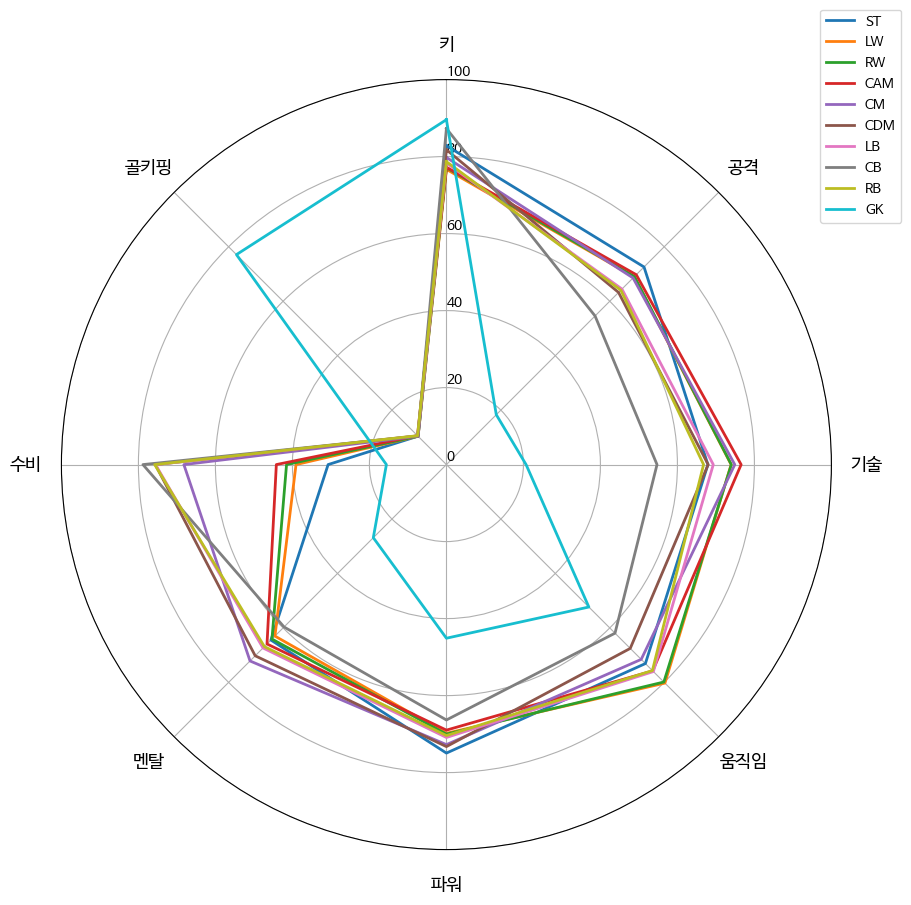

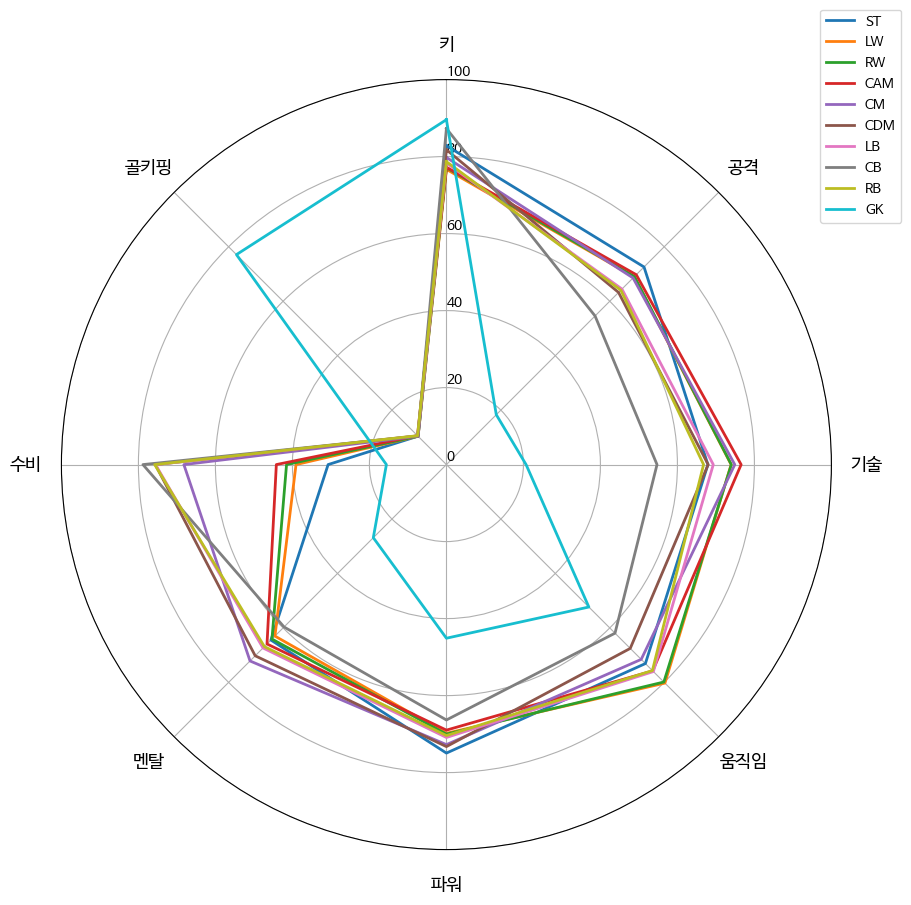

In [86]:
def chart(df, title=None, figsize=(10, 10)):
    from math import pi

    labels = ['키', '공격', '기술', '움직임', '파워', '멘탈', '수비', '골키핑']
    num_labels = len(labels)

    # 등분점 생성
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
    angles += angles[:1]

    # 색상
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # 차트 생성
    fig = plt.figure(figsize=figsize)
    fig.set_facecolor('white')
    ax = plt.subplot(111, polar=True)

    # 각 포지션의 데이터를 그래프에 그리기
    for i, position in enumerate(df.index):
        data_values = [df.loc[position, key] for key in labels]
        data_values += data_values[:1]
        ax.plot(angles, data_values, color=colors[i], linewidth=2, linestyle='solid', label=position)
    # 시작점 설정
    ax.set_theta_offset(pi/2)

    # 시계방향 설정
    ax.set_theta_direction(-1)

    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)

    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which='major', pad=15)

    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)

    # 반지름 축 눈금 설정
    plt.yticks([0, 20, 40, 60, 80, 100], ['0', '20', '40', '60', '80', '100'], fontsize=10)
    plt.ylim(0, 100)

    # 범례 추가
    labels = ['ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB', 'CB', 'RB', 'GK']
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

    plt.show()

chart(df)

In [87]:
features = {
'오버롤': [st['오버롤'].mean(), lw['오버롤'].mean(), rw['오버롤'].mean(), cam['오버롤'].mean(), cm['오버롤'].mean(), cdm['오버롤'].mean(), lb['오버롤'].mean(), cb['오버롤'].mean(), rb['오버롤'].mean(), gk['오버롤'].mean()],
'잠재오버롤': [st['잠재오버롤'].mean(), lw['잠재오버롤'].mean(), rw['잠재오버롤'].mean(), cam['잠재오버롤'].mean(), cm['잠재오버롤'].mean(), cdm['잠재오버롤'].mean(), lb['잠재오버롤'].mean(), cb['잠재오버롤'].mean(), rb['잠재오버롤'].mean(), gk['잠재오버롤'].mean()],
'나이': [st['나이'].mean(), lw['나이'].mean(), rw['나이'].mean(), cam['나이'].mean(), cm['나이'].mean(), cdm['나이'].mean(), lb['나이'].mean(), cb['나이'].mean(), rb['나이'].mean(), gk['나이'].mean()],
'키': [st['키'].mean()-100, lw['키'].mean()-100, rw['키'].mean()-100, cam['키'].mean()-100, cm['키'].mean()-100, cdm['키'].mean()-100, lb['키'].mean()-100, cb['키'].mean()-100, rb['키'].mean()-100, gk['키'].mean()-100],
'몸무게': [st['몸무게'].mean(), lw['몸무게'].mean(), rw['몸무게'].mean(), cam['몸무게'].mean(), cm['몸무게'].mean(), cdm['몸무게'].mean(), lb['몸무게'].mean(), cb['몸무게'].mean(), rb['몸무게'].mean(), gk['몸무게'].mean()],
'약발능력': [st['약발능력'].mean(), lw['약발능력'].mean(), rw['약발능력'].mean(), cam['약발능력'].mean(), cm['약발능력'].mean(), cdm['약발능력'].mean(), lb['약발능력'].mean(), cb['약발능력'].mean(), rb['약발능력'].mean(), gk['약발능력'].mean()],
'개인기': [st['개인기'].mean(), lw['개인기'].mean(), rw['개인기'].mean(), cam['개인기'].mean(), cm['개인기'].mean(), cdm['개인기'].mean(), lb['개인기'].mean(), cb['개인기'].mean(), rb['개인기'].mean(), gk['개인기'].mean()],
'크로스': [st['크로스'].mean(), lw['크로스'].mean(), rw['크로스'].mean(), cam['크로스'].mean(), cm['크로스'].mean(), cdm['크로스'].mean(), lb['크로스'].mean(), cb['크로스'].mean(), rb['크로스'].mean(), gk['크로스'].mean()],
'골결정력': [st['골결정력'].mean(), lw['골결정력'].mean(), rw['골결정력'].mean(), cam['골결정력'].mean(), cm['골결정력'].mean(), cdm['골결정력'].mean(), lb['골결정력'].mean(), cb['골결정력'].mean(), rb['골결정력'].mean(), gk['골결정력'].mean()],
'헤딩': [st['헤딩'].mean(), lw['헤딩'].mean(), rw['헤딩'].mean(), cam['헤딩'].mean(), cm['헤딩'].mean(), cdm['헤딩'].mean(), lb['헤딩'].mean(), cb['헤딩'].mean(), rb['헤딩'].mean(), gk['헤딩'].mean()],
'짧은 패스': [st['짧은 패스'].mean(), lw['짧은 패스'].mean(), rw['짧은 패스'].mean(), cam['짧은 패스'].mean(), cm['짧은 패스'].mean(), cdm['짧은 패스'].mean(), lb['짧은 패스'].mean(), cb['짧은 패스'].mean(), rb['짧은 패스'].mean(), gk['짧은 패스'].mean()],
'발리슛': [st['발리슛'].mean(), lw['발리슛'].mean(), rw['발리슛'].mean(), cam['발리슛'].mean(), cm['발리슛'].mean(), cdm['발리슛'].mean(), lb['발리슛'].mean(), cb['발리슛'].mean(), rb['발리슛'].mean(), gk['발리슛'].mean()],
'드리블': [st['드리블'].mean(), lw['드리블'].mean(), rw['드리블'].mean(), cam['드리블'].mean(), cm['드리블'].mean(), cdm['드리블'].mean(), lb['드리블'].mean(), cb['드리블'].mean(), rb['드리블'].mean(), gk['드리블'].mean()],
'커브': [st['커브'].mean(), lw['커브'].mean(), rw['커브'].mean(), cam['커브'].mean(), cm['커브'].mean(), cdm['커브'].mean(), lb['커브'].mean(), cb['커브'].mean(), rb['커브'].mean(), gk['커브'].mean()],
'프리킥': [st['프리킥'].mean(), lw['프리킥'].mean(), rw['프리킥'].mean(), cam['프리킥'].mean(), cm['프리킥'].mean(), cdm['프리킥'].mean(), lb['프리킥'].mean(), cb['프리킥'].mean(), rb['프리킥'].mean(), gk['프리킥'].mean()],
'긴패스': [st['긴패스'].mean(), lw['긴패스'].mean(), rw['긴패스'].mean(), cam['긴패스'].mean(), cm['긴패스'].mean(), cdm['긴패스'].mean(), lb['긴패스'].mean(), cb['긴패스'].mean(), rb['긴패스'].mean(), gk['긴패스'].mean()],
'볼컨트롤': [st['볼컨트롤'].mean(), lw['볼컨트롤'].mean(), rw['볼컨트롤'].mean(), cam['볼컨트롤'].mean(), cm['볼컨트롤'].mean(), cdm['볼컨트롤'].mean(), lb['볼컨트롤'].mean(), cb['볼컨트롤'].mean(), rb['볼컨트롤'].mean(), gk['볼컨트롤'].mean()],
'가속력': [st['가속력'].mean(), lw['가속력'].mean(), rw['가속력'].mean(), cam['가속력'].mean(), cm['가속력'].mean(), cdm['가속력'].mean(), lb['가속력'].mean(), cb['가속력'].mean(), rb['가속력'].mean(), gk['가속력'].mean()],
'속력': [st['속력'].mean(), lw['속력'].mean(), rw['속력'].mean(), cam['속력'].mean(), cm['속력'].mean(), cdm['속력'].mean(), lb['속력'].mean(), cb['속력'].mean(), rb['속력'].mean(), gk['속력'].mean()],
'민첩성': [st['민첩성'].mean(), lw['민첩성'].mean(), rw['민첩성'].mean(), cam['민첩성'].mean(), cm['민첩성'].mean(), cdm['민첩성'].mean(), lb['민첩성'].mean(), cb['민첩성'].mean(), rb['민첩성'].mean(), gk['민첩성'].mean()],
'반응속도': [st['반응속도'].mean(), lw['반응속도'].mean(), rw['반응속도'].mean(), cam['반응속도'].mean(), cm['반응속도'].mean(), cdm['반응속도'].mean(), lb['반응속도'].mean(), cb['반응속도'].mean(), rb['반응속도'].mean(), gk['반응속도'].mean()],
'밸런스': [st['밸런스'].mean(), lw['밸런스'].mean(), rw['밸런스'].mean(), cam['밸런스'].mean(), cm['밸런스'].mean(), cdm['밸런스'].mean(), lb['밸런스'].mean(), cb['밸런스'].mean(), rb['밸런스'].mean(), gk['밸런스'].mean()],
'슛파워': [st['슛파워'].mean(), lw['슛파워'].mean(), rw['슛파워'].mean(), cam['슛파워'].mean(), cm['슛파워'].mean(), cdm['슛파워'].mean(), lb['슛파워'].mean(), cb['슛파워'].mean(), rb['슛파워'].mean(), gk['슛파워'].mean()],
'점프': [st['점프'].mean(), lw['점프'].mean(), rw['점프'].mean(), cam['점프'].mean(), cm['점프'].mean(), cdm['점프'].mean(), lb['점프'].mean(), cb['점프'].mean(), rb['점프'].mean(), gk['점프'].mean()],
'스태미너': [st['스태미너'].mean(), lw['스태미너'].mean(), rw['스태미너'].mean(), cam['스태미너'].mean(), cm['스태미너'].mean(), cdm['스태미너'].mean(), lb['스태미너'].mean(), cb['스태미너'].mean(), rb['스태미너'].mean(), gk['스태미너'].mean()],
'힘': [st['힘'].mean(), lw['힘'].mean(), rw['힘'].mean(), cam['힘'].mean(), cm['힘'].mean(), cdm['힘'].mean(), lb['힘'].mean(), cb['힘'].mean(), rb['힘'].mean(), gk['힘'].mean()],
'중거리슛': [st['중거리슛'].mean(), lw['중거리슛'].mean(), rw['중거리슛'].mean(), cam['중거리슛'].mean(), cm['중거리슛'].mean(), cdm['중거리슛'].mean(), lb['중거리슛'].mean(), cb['중거리슛'].mean(), rb['중거리슛'].mean(), gk['중거리슛'].mean()],
'적극성': [st['적극성'].mean(), lw['적극성'].mean(), rw['적극성'].mean(), cam['적극성'].mean(), cm['적극성'].mean(), cdm['적극성'].mean(), lb['적극성'].mean(), cb['적극성'].mean(), rb['적극성'].mean(), gk['적극성'].mean()],
'가로채기': [st['가로채기'].mean(), lw['가로채기'].mean(), rw['가로채기'].mean(), cam['가로채기'].mean(), cm['가로채기'].mean(), cdm['가로채기'].mean(), lb['가로채기'].mean(), cb['가로채기'].mean(), rb['가로채기'].mean(), gk['가로채기'].mean()],
'위치선정': [st['위치선정'].mean(), lw['위치선정'].mean(), rw['위치선정'].mean(), cam['위치선정'].mean(), cm['위치선정'].mean(), cdm['위치선정'].mean(), lb['위치선정'].mean(), cb['위치선정'].mean(), rb['위치선정'].mean(), gk['위치선정'].mean()],
'시야': [st['시야'].mean(), lw['시야'].mean(), rw['시야'].mean(), cam['시야'].mean(), cm['시야'].mean(), cdm['시야'].mean(), lb['시야'].mean(), cb['시야'].mean(), rb['시야'].mean(), gk['시야'].mean()],
'페널티킥': [st['페널티킥'].mean(), lw['페널티킥'].mean(), rw['페널티킥'].mean(), cam['페널티킥'].mean(), cm['페널티킥'].mean(), cdm['페널티킥'].mean(), lb['페널티킥'].mean(), cb['페널티킥'].mean(), rb['페널티킥'].mean(), gk['페널티킥'].mean()],
'침착성': [st['침착성'].mean(), lw['침착성'].mean(), rw['침착성'].mean(), cam['침착성'].mean(), cm['침착성'].mean(), cdm['침착성'].mean(), lb['침착성'].mean(), cb['침착성'].mean(), rb['침착성'].mean(), gk['침착성'].mean()],
'대인수비': [st['대인수비'].mean(), lw['대인수비'].mean(), rw['대인수비'].mean(), cam['대인수비'].mean(), cm['대인수비'].mean(), cdm['대인수비'].mean(), lb['대인수비'].mean(), cb['대인수비'].mean(), rb['대인수비'].mean(), gk['대인수비'].mean()],
'스탠딩태클': [st['스탠딩태클'].mean(), lw['스탠딩태클'].mean(), rw['스탠딩태클'].mean(), cam['스탠딩태클'].mean(), cm['스탠딩태클'].mean(), cdm['스탠딩태클'].mean(), lb['스탠딩태클'].mean(), cb['스탠딩태클'].mean(), rb['스탠딩태클'].mean(), gk['스탠딩태클'].mean()],
'슬라이딩태클': [st['슬라이딩태클'].mean(), lw['슬라이딩태클'].mean(), rw['슬라이딩태클'].mean(), cam['슬라이딩태클'].mean(), cm['슬라이딩태클'].mean(), cdm['슬라이딩태클'].mean(), lb['슬라이딩태클'].mean(), cb['슬라이딩태클'].mean(), rb['슬라이딩태클'].mean(), gk['슬라이딩태클'].mean()]
}

data = pd.DataFrame(features)
data.index = ['ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB', 'CB', 'RB', 'GK']

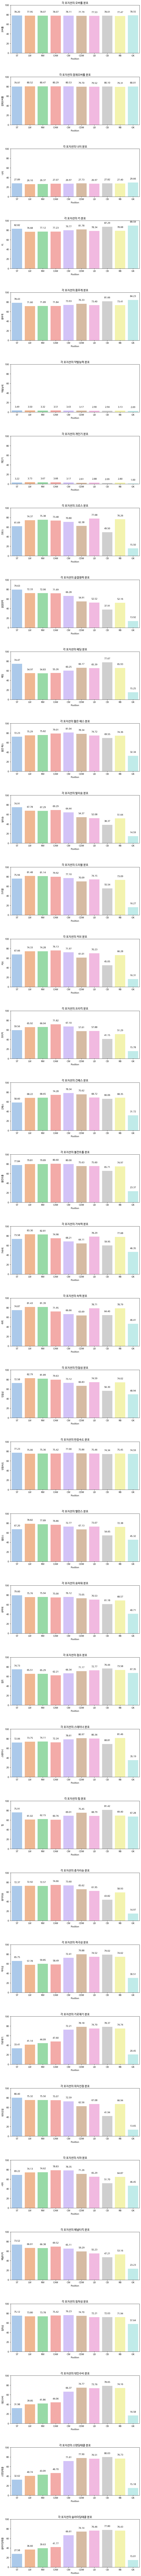

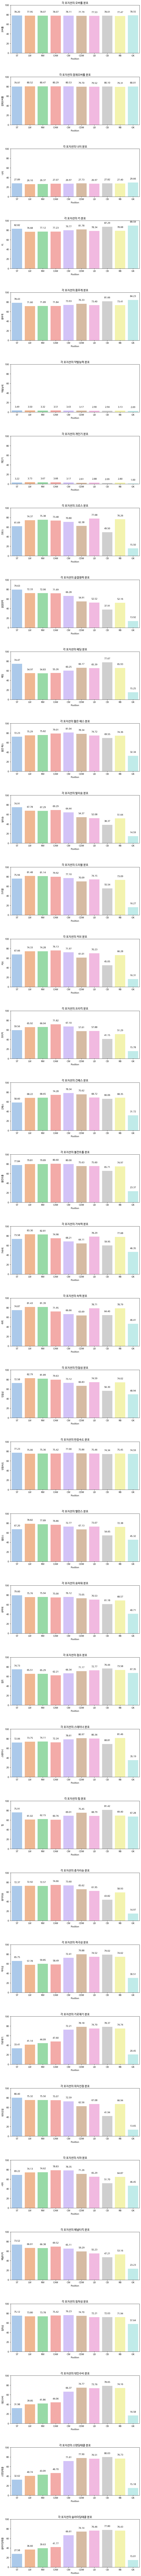

In [88]:
fig, axes = plt.subplots(nrows=36, ncols=1, figsize=(10, 200))

for i, col in enumerate(data.columns):
    sns.barplot(x=data.index, y=col, data=data, ax=axes[i], hue=data.index, palette='pastel', legend=False)
    axes[i].set_title(f'각 포지션의 {col} 분포')
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel(col)
    axes[i].set_ylim(0, 100)

    # 각 막대에 대한 평균값 표시
    mean_value = data[col].mean()
    for j, value in enumerate(data[col]):
        axes[i].text(j, value + 5, f"{value:.2f}", ha='center', va='bottom')

plt.subplots_adjust(hspace=0.5)
plt.show()